In [18]:
#Lets have a look at the data and play around with it a bit to get an understanding

In [2]:
import pandas as pd
iris_data = pd.read_csv('iris.data.txt')
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_date = pd.read_csv('iris.data.txt', na_values=['NA'])

In [4]:
iris_data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


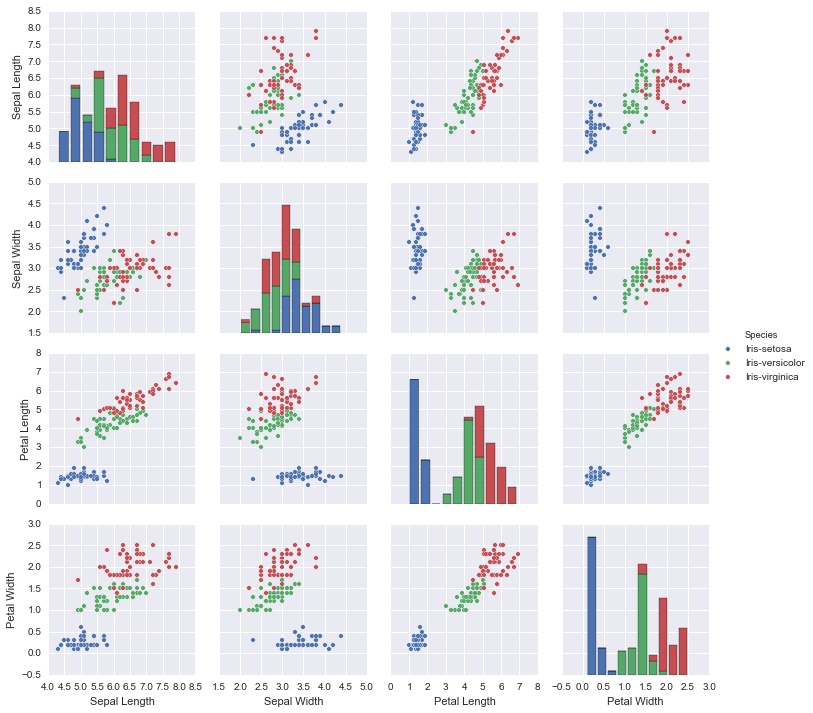

In [6]:
sb.pairplot(iris_data.dropna(), hue='Species')

In [7]:
iris_data = iris_data.loc[(iris_data['Species'] != 'Iris-setosa') | (iris_data['Sepal Width'] >= 2.5)]

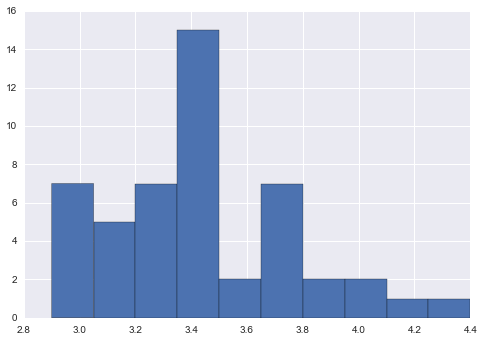

In [8]:
iris_data.loc[iris_date['Species'] == 'Iris-setosa','Sepal Width'].hist()

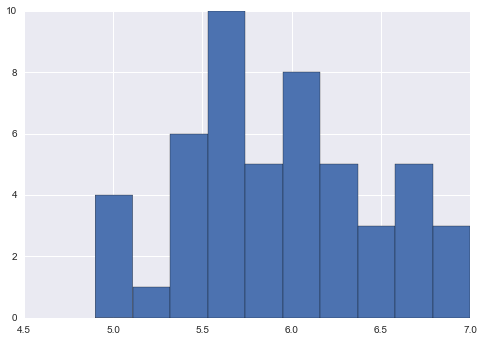

In [9]:
iris_data.loc[iris_data['Species'] == 'Iris-versicolor', 'Sepal Length'].hist()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species


In [10]:
assert len(iris_data['Species'].unique()) == 3

In [11]:
assert iris_data.loc[iris_data['Species'] == 'Iris-versicolor', 'Sepal Length'].min() >= 2.5

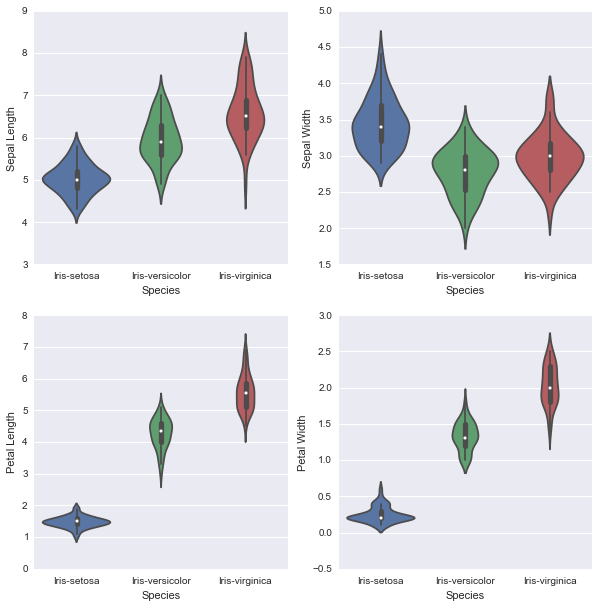

In [17]:
plt.figure(figsize=(10,10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'Species':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='Species', y=column, data=iris_data)

In [19]:
#Lets actually start our processing

In [20]:
iris_data = pd.read_csv('iris.data.txt')

In [21]:
all_inputs = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values

In [22]:
all_classes = iris_data['Species'].values

In [23]:
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [31]:
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs, 
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state =1)

In [33]:
#We use a decision tree classifier because they are scale invariant (speed doesn't decrease with data)
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
decision_tree_classifier.score(testing_inputs,testing_classes)
#returns the accuracy of the classifier

0.97368421052631582

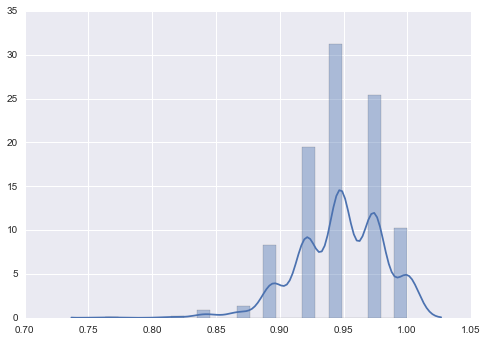

In [36]:
#depending on the sampling - the accuracy can change
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

sb.distplot(model_accuracies)

#performing differently on different subsets is called overfitting - learns to classify 'too well' so it doesn't generalize

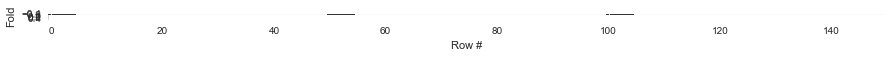

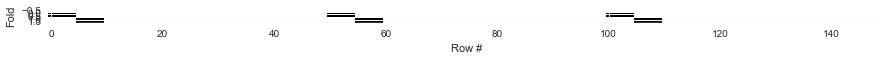

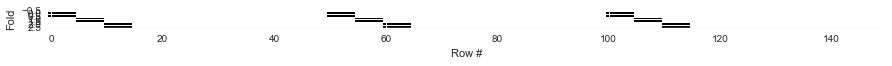

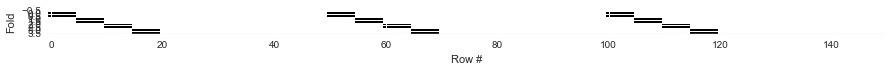

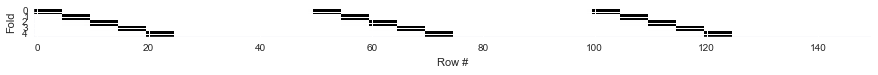

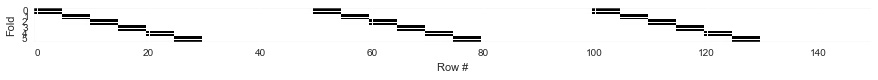

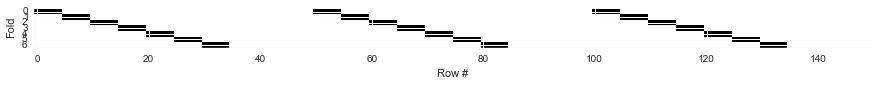

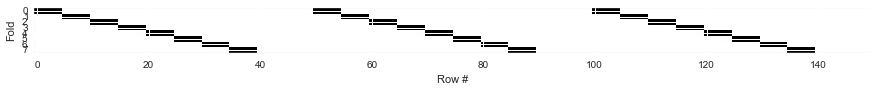

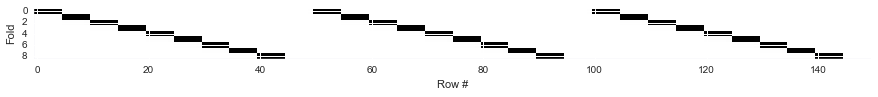

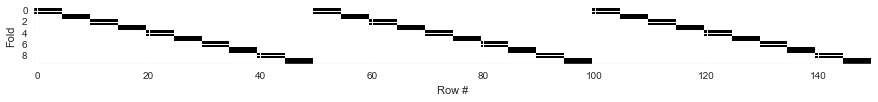

In [39]:
#k-fold cross validation
#In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples.
#Of the k subsamples, a single subsample is retained as the validation data for testing the model,
#and the remaining k − 1 subsamples are used as training data. 
#The cross-validation process is then repeated k times (the folds),
#with each of the k subsamples used exactly once as the validation data.
#The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation.
#The advantage of this method over repeated random sub-sampling (see below) is that all observations are used 
#for both training and validation, and each observation is used for validation exactly once. 
#10-fold cross-validation is commonly used,[7] but in general k remains an unfixed parameter.

#When k=n (the number of observations), the k-fold cross-validation is exactly the leave-one-out cross-validation.

#In stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal 
#in all the folds. In the case of a dichotomous classification, 
#this means that each fold contains roughly the same proportions of the two types of class labels.

#StratifiedKFold keeps the class proportions the same across the folds which is vital for maintaining a representitive
#subet of our data

import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        plt.figure(figsize=(15,15))
        plt.imshow(masks, interpolation='none')
        plt.ylabel('Fold')
        plt.xlabel('Row #')
plot_cv(StratifiedKFold(all_classes,n_folds=10), len(all_classes))

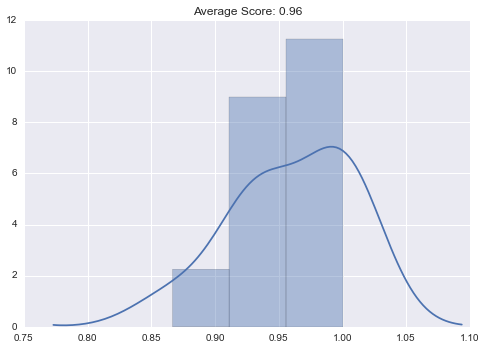

In [42]:
#10 fold cross-validation
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

#list of scores so we can plot it
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))

#This is all to generate a much more consistant validator

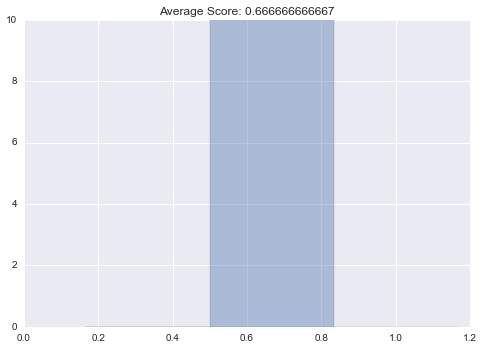

In [43]:
#Tune those parameters

#limiting the depth makes the score fall dramatically
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))

In [45]:
#common Method to tweak parameters is 'Grid Search'

#Explore a range of parameters to find the best performing combination
#Focus searching on the best range, and keep repeating until it doesn't get better



from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()
parameter_grid = {'max_depth': [1,2,3,4,5],
                'max_features': [1,2,3,4]}
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                          param_grid=parameter_grid,
                          cv=cross_validation)
grid_search.fit(all_inputs,all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.966666666667
Best parameters: {'max_features': 3, 'max_depth': 3}


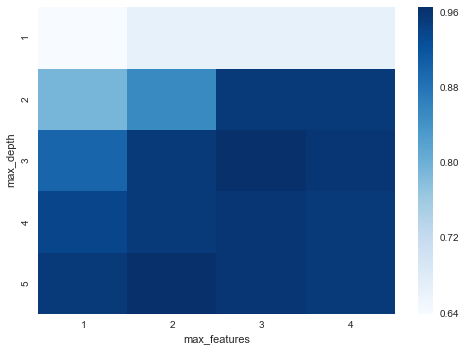

In [49]:
grid_visualisation = []

for grid_pair in  grid_search.grid_scores_:
    grid_visualisation.append(grid_pair.mean_validation_score)

grid_visualisation = np.array(grid_visualisation)
grid_visualisation.shape = (5,4)
sb.heatmap(grid_visualisation, cmap="Blues")

plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

#looking at this param space, we can see that max features above 3 improves the results
#as with  a max_depth of 3 or above

In [50]:
# Gini impurity is a measure of how often a randomly chosen element from the set would be
#incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset

#Entropy criterion is using how much information we gained doing each split in the decision tree

#splitting the data - Either 'best' or 'random best'
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_features': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [52]:
#set the classifier to the best one from the grid search
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [53]:
#lets see the deicison tree

import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot','w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

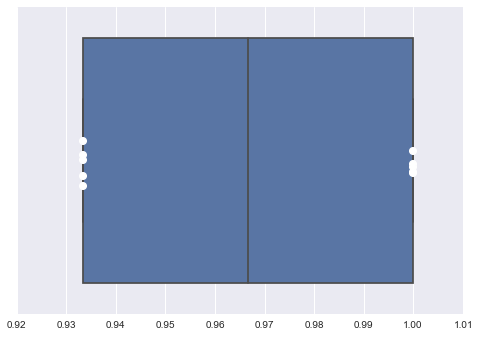

In [54]:
#classifier performance

rf_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sb.boxplot(rf_scores)
sb.stripplot(rf_scores, jitter=True, color='white')

In [61]:
#Random Forest Classifiers - multiple decision trees each trained on random subsets of training samples

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.966666666667
Best parameters: {'max_features': 2, 'n_estimators': 25, 'criterion': 'gini', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

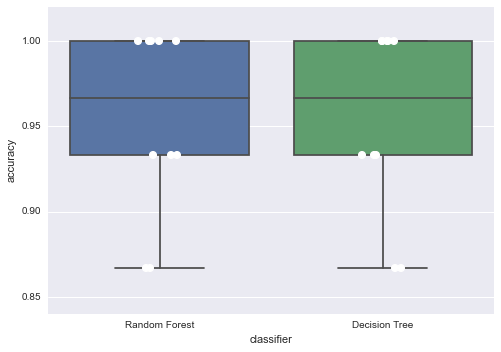

In [63]:
#compare performance
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

#both classifiers work the same. RFC's are better for hundreds of features - where-as decisions trees are fine for a few.